# Employee Exit Surveys

Date: November 2023

This project will review employee exit surveys from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Stakeholders want to know if there is a relationship between employee dissatisfaction and employee resignation. This project will analyze both datasets to understand the role that dissatisfaction may play in employee resignation among employees who worked for a short period, employees who worked for a long period, employees who are younger, and employees who are older.


Datasets have been converted from cp1252 to UTF-8 for ease of use.

Below are some of the main columns we will use for our analysis:

### DETE

- `ID`: Participants' survey identification number
- `SeparationType`: Reason for employment cessation
- `Cease Date`: Year or month of employment cessation
- `DETE Start Date`: Year employment began with DETE

### TAFE

- `Record ID`: Participants' survey identification number
- `Reason for ceasing employment`: Reason for employment cessation
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: Length of employment (in years)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

# read datasets and missing values("Not stated")
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv", na_values = "Not Stated")

Lets start by exploring dete dataset.

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

There are 822 rows and 56 columns in this dataset. The last few columns have a high degree of missing data, and even ones that do not have many missing values may have entries listed as Not Stated rather than NaN, as seen in the second value of DETE Start Date.

Now lets explore tafe dataset.

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

There are 702 rows and 72 columns in the TAFE dataset. Many of the columns in the TAFE dataset have similar meanings to the DETE dataset, but are named slightly differently. We will clean the data later on to have uniform column names.

Additionally, there are many columns in both datasets that are not necessary for our exploration of employee dissatisfaction, and several columns that do relate to dissatisfaction.

### Identify Missing Values & Drop Unnecessary Columns

In [8]:
# drop unnecesary columns
dete_survey_updated = dete_survey.drop(columns = dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(columns = tafe_survey.columns[17:66], axis = 1)

# check results
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

## Cleaning Column Names

Now, we will standardize the column names to snake_case convention, and make the column names uniform between the two datasets, if applicable.

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ", "_").str.strip()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [10]:
#update the TAFE column names to snake_case convention and to match DETE
renaming_dict = {'Record ID': 'id',
                'CESSATION YEAR': 'cease_date',
                'Reason for ceasing employment': 'separationtype',
                'Gender. What is your Gender?': 'gender',
                'CurrentAge. Current Age': 'age',
                'Employment Type. Employment Type': 'employment_status',
                'Classification. Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(columns = renaming_dict, inplace = True)

# check the result
# remaining columns will be hadeled later
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filtering Data

Our goal of the project is to understand reasons why employees have resigned from their job. As such, we will explore the separation_type column to first understand the reason why employees have left (resignation, termination, etc).

In [11]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Since there are a lot of reasons why an employee left a job, such as expered contract, transfer or termination I am going to subset the data to only focus on resignations.

In [13]:
# use boolean indexing to select only "resignation", create new df
dete_resignations = dete_survey_updated[(dete_survey_updated["separationtype"] == "Resignation-Other reasons") |
                                        (dete_survey_updated["separationtype"] == "Resignation-Other employer") |
                                        (dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate")].copy()
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [14]:
# use boolean indexing to select only "Resignation", create new df
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()
tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Verifying the Data

Before continuing to clean and manipulate the data, let's verify that there are no major inconsistencies. Major inconcistencies could ultimately make our analysis useless, if not caught.

Let's focus on the columns with information about the year the employee started or ended their job.

In [15]:
# starting with dete dataset
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [16]:
# ectract only year from "cease_date" and convert to float
year_pattern = r"([0-9]{4})"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(year_pattern).astype(float)

In [17]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

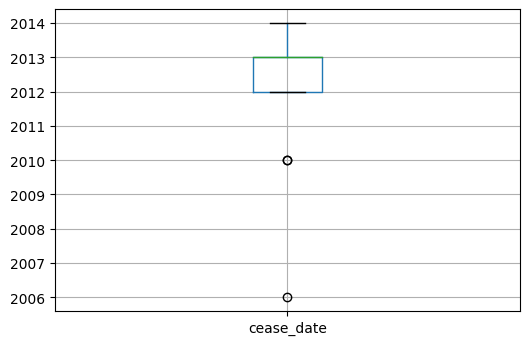

In [18]:
dete_resignations.boxplot(column = "cease_date")
plt.show()

In [19]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

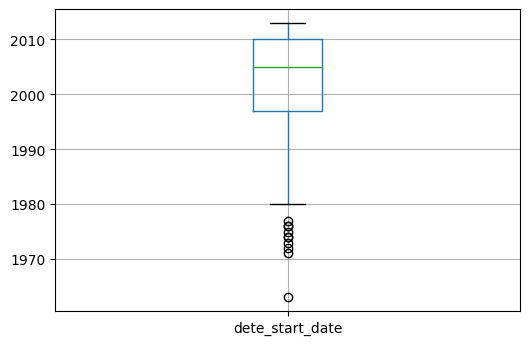

In [20]:
dete_resignations.boxplot(column = "dete_start_date")
plt.show()

In [21]:
# lets continue wiht tafe dataset
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

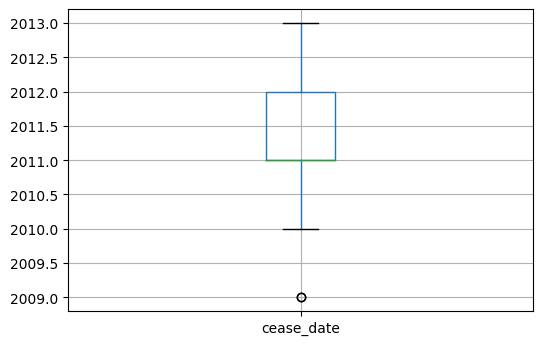

In [22]:
tafe_resignations.boxplot(column = "cease_date")
plt.show()

After a little bit of cleaning, both datasets dates seem fairly reasonable. I did not notice any outliers.

## Creating a New Column

In the TAFE dataset, the `institute_service` column represents the number of years that the individual was employed by the company. There is not an equivalent in the DETE dataset, but we can calculate this by subtracting each individual start date from their end date, and create a new column to store this information.

In [23]:
tafe_resignations["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [24]:
# create new column "insitute_service" in dete df
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [25]:
# check the values
dete_resignations["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

## Identifying Dissatisfied Employees

The following columns may relate to employee dissatisfaction:

**DETE:**

- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

**TAFE:**

- `dissatisfaction`
- `job_dissatisfaction`

If an employee indicated that any of the above factors were part of why they resigned, we will indicate that they were dissatisfied. This information will be stored in a new column labelled `dissatisfied`.

In [26]:
#first, let's explore the values within the two columns indicating dissatisfaction within the TAFE dataset
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [28]:
tafe_resignations["Contributing Factors. Dissatisfaction"].head(20)

3                                          -
4                                          -
5                                          -
6                                          -
7                                          -
8                                          -
9                                          -
10                                         -
13                                         -
14    Contributing Factors. Dissatisfaction 
15                                         -
16                                       NaN
17                                         -
18                                       NaN
19                                         -
20    Contributing Factors. Dissatisfaction 
21                                         -
22                                         -
23                                         -
24                                         -
Name: Contributing Factors. Dissatisfaction, dtype: object

Since there are only two values listed above for each category, we will transform the values to be True/False for dissatisfaction. The value will remain as NaN if omitted.

In [29]:
# create a function to update columns either True / False or NaN
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == "-":
        return False
    else:
        return True
    

In [30]:
# copy df and apply the "update_vals" function
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up["Contributing Factors. Dissatisfaction"] = tafe_resignations_up["Contributing Factors. Dissatisfaction"].map(update_vals)
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"] = tafe_resignations_up["Contributing Factors. Job Dissatisfaction"].map(update_vals)

In [31]:
# check the result
tafe_resignations_up["Contributing Factors. Dissatisfaction"].value_counts(dropna = False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [32]:
# check the result
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [33]:
# create new columns "dissatisfied"
# if true for any columns then true for "dissatisfied"
tafe_resignations_up["dissatisfied"] = tafe_resignations_up[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].any(skipna = False, axis = 1)
tafe_resignations_up["dissatisfied"].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Above, we see that 91 of employees resigned from TAFE due to dissatisfaction.

Next, let's repeat this process for the DETE dataset.

In [34]:
# create a list of dissatisfaction columns
dete_factors = ["job_dissatisfaction",
                "dissatisfaction_with_the_department",
                "physical_work_environment",
                "lack_of_recognition",
                "lack_of_job_security",
                "work_location",
                "employment_conditions",
                "work_life_balance",
                "workload"]


In [35]:
# inspect the data
dete_resignations[dete_factors].apply(pd.Series.value_counts, dropna = False)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
False,270,282,305,278,297,293,288,243,284
True,41,29,6,33,14,18,23,68,27


In [36]:
# create a copy of df
dete_resignations_up = dete_resignations.copy()

In [37]:
# create new column "dissatisfied"
dete_resignations_up["dissatisfied"] = dete_resignations_up[dete_factors].any(skipna = False, axis = 1)

In [38]:
# check the result
dete_resignations_up["dissatisfied"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

About half of the employyes who resigned from DETE were due to dissatisfaction. This is much more than from TAFE.

## Combining the Data

Now that we've cleaned the data, it's time to combine the two datasets for subsequent analysis. We will also add a column (institute) to indicate which rows are from which institution.

In [39]:
# create new columns to indicate insitute
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [40]:
# combined both df into "combined" df
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [41]:
# inspect missing data in "combined"
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

There is a lot of missing data. Although some columns have similar names and could be combined, which would reduce missingness, we don't need many of these columns for our analysis anymore.

Our combined dataset has 632 rows. We will drop any columns that do not have at least 500 non-null values.

In [42]:
# drop data with less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis = 1)

In [43]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


## Cleaning the Service Column

Although the institute_service values are consistent throughout the dataframe, we still have more bins than needed. I will combine the original categories into 4 categories:

- New: 3 or less years
- Experienced: 3-6 years
- Established: 7-10 years
- Veteran: 11 or more years

The category type will be a new column called `service_cat`.

In [44]:
# check "institute_service" column
combined_updated["institute_service"].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [45]:
# create func to categorize "insitute_service" column
def service_categories(val):
    if pd.isnull(val):
        return np.nan
    try:
        val = int(val)
        if val in range(0, 3):
            return "New"
        elif val in range(3, 7):
            return "Experienced"
        elif val in range(7, 11):
            return "Established"
        elif val in range(11, 100):
            return "Veteran"
    except:
        if val == "Less than 1 year" or val == "1-2":
            return "New"
        elif val == "3-4" or val == "5-6":
            return "Experienced"
        elif val == "7-10":
            return "Established"
        else:
            return "Veteran"

In [46]:
# create new df
combined_up2 = combined_updated.copy()
# apply service_categories function
combined_up2["service_cat"] = combined_up2["institute_service"].apply(service_categories)
# check the result
combined_up2["service_cat"].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Performing Initial Analysis

I will now fill in some remaining missing data and perform initial analysis about employee dissatisifaction.

In [47]:
# check "dissatisfied" column for missing values
combined_up2["dissatisfied"].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [48]:
# replace missing values with False (the most frequent value)
combined_up2["dissatisfied"].fillna(False, inplace = True)

In [49]:
# check result
combined_up2["dissatisfied"].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

Now that I've filled the missing values in the `dissatisfied` column, I will create a pivot table to calculate the percentage of dissatisifed employees within each of the `service_cat` groups.

A True value is considered to have a binary value of 1; a False value is considered to be 0.

In [50]:
sat_by_cat = combined_up2.pivot_table(values = "dissatisfied", index = "service_cat", margins = True, dropna = False)

In [51]:
sat_by_cat

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294
All,0.368664


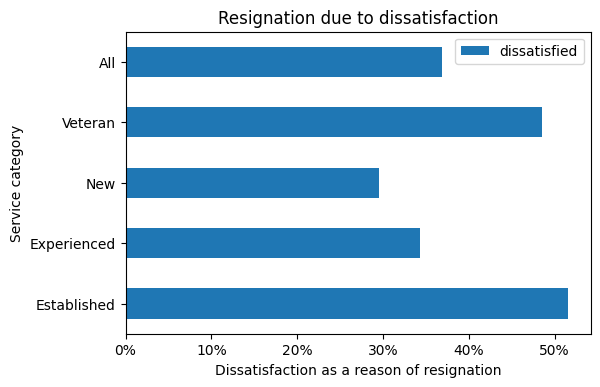

In [52]:
# plot the results from pivot table
sat_by_cat.plot(kind = "barh")
plt.title("Resignation due to dissatisfaction")
plt.xlabel("Dissatisfaction as a reason of resignation")
plt.ylabel("Service category")
plt.xticks(ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
         labels = ["0%", "10%", "20%", "30%", "40%", "50%"])
plt.show()

38% of employees resigned due to dissatisfaction.

The established employees and veteran employees (7-10 years and 11+ years, respectively) were the most likely groups to resign due to dissatisfaction, with about half of them reporting dissatisfaction as a reason for resigning.

New and experienced employees were less likely to report dissatisfaction as a reason for resigning than their established and veteran counterparts. These groups may be newer in the workforce, and as such, may be job hopping or figuring out what job possition best suits them.

## Data Cleaning Part 2

Now that we've gotten a better sense of dissatisfaction among employees based on years worked at the company, let's try to clean other columns and perform simillar analysis.

In [53]:
combined_up2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: bool(1), float64(2), object(8)
memory usage: 56.6+ KB


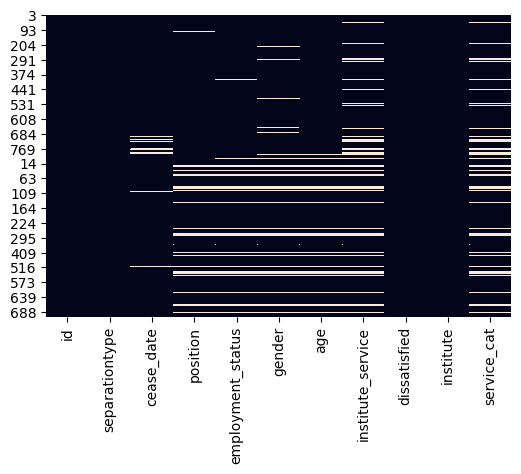

In [54]:
# create seaborn heatmap to visualize missing values
sns.heatmap(combined_up2.isnull(), cbar=False)
plt.show()

In [55]:
# starting with "cease_date"
combined_up2["cease_date"].value_counts(dropna = False)

2012.0    223
2013.0    201
2011.0    116
2010.0     70
2014.0     22
NaN        16
2009.0      2
2006.0      1
Name: cease_date, dtype: int64

In [56]:
# fill in missing values as the mena of the column
combined_up2["cease_date"].fillna(combined_up2["cease_date"].mean().round(), inplace = True)

In [57]:
# lets continue with "position" column
combined_up2["position"].value_counts(dropna = False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)

In [58]:
# for "position" column I decided to randomly pick the position for NaN values based on their distribution
# calculate frequency of different positions
freq_position = combined_up2["position"].value_counts(normalize = True)
# identify missing data
missing_position = combined_up2["position"].isnull()
# fill in missing data
combined_up2.loc[missing_position, "position"] = np.random.choice(freq_position.index, size = len(combined_up2[missing_position]), p = freq_position)
# check the result
combined_up2["position"].value_counts(dropna = False)


Administration (AO)                                        158
Teacher                                                    139
Teacher (including LVT)                                    108
Teacher Aide                                                69
Cleaner                                                     46
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            15
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
School Based Professional Staff (Therapist, nurse, etc)      6
Workplace Training Officer                                   6
Guidance Officer                                             5
Technical Officer (TO)                                 

### Cleaning and analysing employment_status column

In [59]:
# continue to "employment_status" column
combined_up2["employment_status"].value_counts(dropna = False)

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

In [60]:
# for "employment_status" column I will fill in the missing values same way I did in "position" column
# calculate frequency of different "emploement_satus" values
freq_em_stat = combined_up2["employment_status"].value_counts(normalize = True)
# identify missing data
missing_em_stat = combined_up2["employment_status"].isnull()
# fill in missing data
combined_up2.loc[missing_em_stat, "employment_status"] = np.random.choice(freq_em_stat.index, size = len(combined_up2[missing_em_stat]), p = freq_em_stat)
# check the result
combined_up2["employment_status"].value_counts(dropna = False)

Permanent Full-time    280
Permanent Part-time    163
Temporary Full-time    129
Temporary Part-time     42
Contract/casual         32
Casual                   5
Name: employment_status, dtype: int64

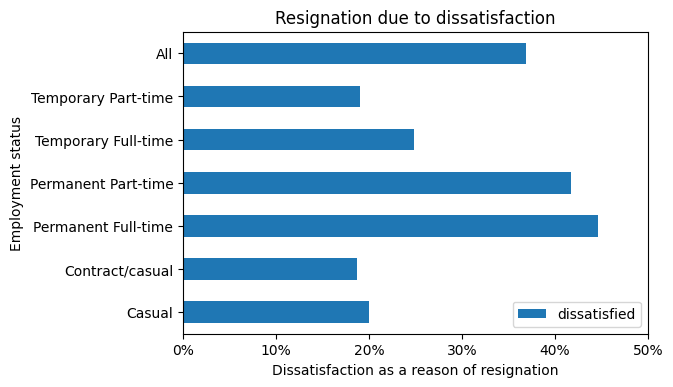

In [61]:
# Lets visualize resignations based on employment status.
sat_by_em_stat = combined_up2.pivot_table(values = "dissatisfied", index = "employment_status", margins = True, dropna = False)

sat_by_em_stat.plot(kind = "barh")
plt.title("Resignation due to dissatisfaction")
plt.xlabel("Dissatisfaction as a reason of resignation")
plt.ylabel("Employment status")
plt.xticks(ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
         labels = ["0%", "10%", "20%", "30%", "40%", "50%"])
plt.show()

In [62]:
sat_by_em_stat

,dissatisfied
employment_status,
Casual,0.200000
Contract/casual,0.187500
Permanent Full-time,0.446429
Permanent Part-time,0.417178
Temporary Full-time,0.248062
Temporary Part-time,0.190476
All,0.368664


As we can see employees who are working permamently eihter full or part-time resing due to dissatisfation far more often (about 40 - 47%) then employees who work temporary either full or part-time or on contract/casual (about 18 - 23%).

### Cleaning and analysing gender column

In [63]:
# check the columns for missing values
combined_up2["gender"].value_counts(dropna = False)


Female    424
Male      168
NaN        59
Name: gender, dtype: int64

In [64]:
# I am going to clean gender column same way I cleaned position and employemnt status columns
# calculate frequency of gender colum values
freq_gender = combined_up2["gender"].value_counts(normalize = True)
# get missing data
missing_gender = combined_up2["gender"].isnull()
# randomly fill in missing values
combined_up2.loc[missing_gender, "gender"] = np.random.choice(freq_gender.index, size = len(combined_up2[missing_gender]), p = freq_gender.values)
# check the result
combined_up2["gender"].value_counts(dropna = False)

Female    471
Male      180
Name: gender, dtype: int64

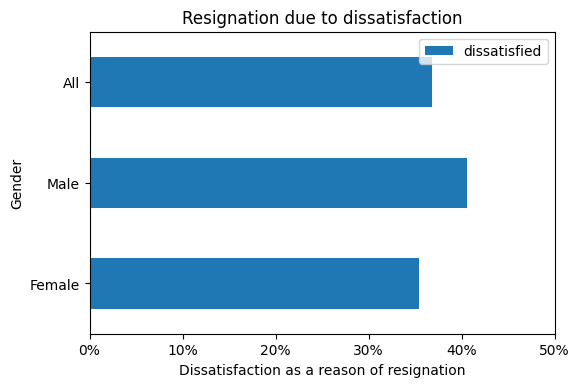

In [65]:
# Lets visualize resignation based on genders
sat_by_gen = combined_up2.pivot_table(values = "dissatisfied", index = "gender", margins = True, dropna = False)

sat_by_gen.plot(kind = "barh")
plt.title("Resignation due to dissatisfaction")
plt.xlabel("Dissatisfaction as a reason of resignation")
plt.ylabel("Gender")
plt.xticks(ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
         labels = ["0%", "10%", "20%", "30%", "40%", "50%"])
plt.show()

In [66]:
sat_by_gen

,dissatisfied
gender,
Female,0.354565
Male,0.405556
All,0.368664


There is basically no difference difference between the 2 genders in resignations due to dissatisfaction. About 37% of both genders resign due to dissatisfaction.

### Cleaning and analysing age column

In [67]:
combined_up2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         651 non-null    float64
 3   position           651 non-null    object 
 4   employment_status  651 non-null    object 
 5   gender             651 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: bool(1), float64(2), object(8)
memory usage: 56.6+ KB


In [68]:
# check the age column values
combined_up2["age"].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [69]:
# clean the column of white space and join on "-"
combined_up2["age"] = combined_up2["age"].str.split().str.join("-")
combined_up2["age"].value_counts(dropna = False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
56-or-older      29
56-60            26
61-or-older      23
20-or-younger    10
Name: age, dtype: int64

In [70]:
# combine 3 age values in to 1
combined_up2["age"] = combined_up2["age"].str.replace("56-60", "56-or-older").str.replace("61-or-older", "56-or-older")
# check work
combined_up2["age"].value_counts(dropna = False).sort_index()

20-or-younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56-or-older      78
NaN              55
Name: age, dtype: int64

In [71]:
# check missing values
combined_up2[combined_up2["age"].isnull()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
214,2.150000e+02,Resignation-Other reasons,2012.0,School Administrative Staff,Permanent Part-time,Female,NaN,13,False,DETE,Veteran
285,2.860000e+02,Resignation-Move overseas/interstate,2012.0,Cleaner,Permanent Full-time,Female,NaN,0,False,DETE,New
405,4.060000e+02,Resignation-Other reasons,2012.0,Teacher,Permanent Part-time,Female,NaN,NaN,False,DETE,NaN
802,8.040000e+02,Resignation-Move overseas/interstate,2013.0,Teacher Aide,Permanent Part-time,Female,NaN,NaN,False,DETE,NaN
821,8.230000e+02,Resignation-Move overseas/interstate,2013.0,Teacher Aide,Permanent Full-time,Female,NaN,NaN,False,DETE,NaN
3,6.341399e+17,Resignation,2010.0,Administration (AO),Permanent Full-time,Male,NaN,NaN,False,TAFE,NaN
16,6.341770e+17,Resignation,2010.0,Teacher (including LVT),Temporary Part-time,Female,NaN,NaN,False,TAFE,NaN
18,6.341779e+17,Resignation,2010.0,Teacher,Permanent Full-time,Female,NaN,NaN,False,TAFE,NaN
19,6.341820e+17,Resignation,2010.0,Teacher,Permanent Full-time,Female,NaN,NaN,False,TAFE,NaN
20,6.341821e+17,Resignation,2010.0,Cleaner,Permanent Full-time,Female,NaN,NaN,True,TAFE,NaN


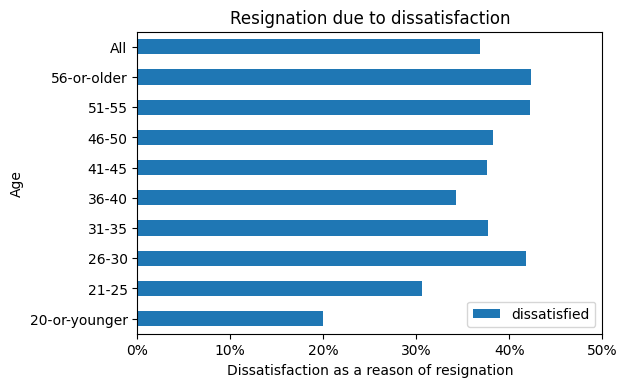

In [72]:
# Lets visualize resignations based on age groups
sat_by_age = combined_up2.pivot_table(values = "dissatisfied", index = "age", margins = True, dropna = False)

sat_by_age.plot(kind = "barh")
plt.title("Resignation due to dissatisfaction")
plt.xlabel("Dissatisfaction as a reason of resignation")
plt.ylabel("Age")
plt.xticks(ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
         labels = ["0%", "10%", "20%", "30%", "40%", "50%"])
plt.show()

In [73]:
sat_by_age

,dissatisfied
age,
20-or-younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56-or-older,0.423077


The analysis above suggests that younger employees (age 25 or less) were less likely to cite dissatisfaction as a reason for resigning.

Employees age 26 and older seemed to cite dissatisfaction as a reason for resigning between 36%-43% of the time.

# Conclusion

Overall, our analysis suggests that older employees and employees with long and/or permanent employment at TAFE/DETE were more likely to cite dissatisfaction as a reason for resigning.

If stakeholders wish to retain these groups, then the institutes may conduct focus groups to understand their employees' needs and pain points. Then, the institutes must create and enact a plan to combat these pain points. Afterwards, they should conduct an assessment to determine whether the changes were successful at combating employee dissatisfaction and retaining employees.